#Intro al Reto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [3]:
url = 'Datasets/Reto Bloque 2/Datasets/2012_2019_PlatteRiverWeir_features_merged_all.csv'
df = pd.read_csv(url)
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns.tolist()

['SensorTime',
 ' CaptureTime',
 ' Filename',
 ' Agency',
 ' SiteNumber',
 ' TimeZone',
 ' Stage',
 ' Discharge',
 ' CalcTimestamp',
 ' width',
 ' height',
 ' exposure',
 ' fNumber',
 ' isoSpeed',
 ' shutterSpeed',
 ' grayMean',
 ' graySigma',
 ' entropyMean',
 ' entropySigma',
 ' hMean',
 ' hSigma',
 ' sMean',
 ' sSigma',
 ' vMean',
 ' vSigma',
 ' areaFeatCount',
 ' grayMean 0',
 ' graySigma 0',
 ' entropyMean 0',
 ' entropySigma 0',
 ' hMean 0',
 ' hSigma 0',
 ' sMean 0',
 ' sSigma 0',
 ' vMean 0',
 ' vSigma 0',
 ' grayMean 1',
 ' graySigma 1',
 ' entropyMean 1',
 ' entropySigma 1',
 ' hMean 1',
 ' hSigma 1',
 ' sMean 1',
 ' sSigma 1',
 ' vMean 1',
 ' vSigma 1',
 ' WeirAngle',
 ' WeirPt1X',
 ' WeirPt1Y',
 ' WeirPt2X',
 ' WeirPt2Y',
 ' WwRawLineMin',
 ' WwRawLineMax',
 ' WwRawLineMean',
 ' WwRawLineSigma',
 ' WwCurveLineMin',
 ' WwCurveLineMax',
 ' WwCurveLineMean',
 ' WwCurveLineSigma']

In [5]:
df.isnull().sum()

SensorTime           0
 CaptureTime         0
 Filename            0
 Agency              0
 SiteNumber          0
 TimeZone            0
 Stage               0
 Discharge           0
 CalcTimestamp       0
 width               0
 height              0
 exposure            0
 fNumber             0
 isoSpeed            0
 shutterSpeed        0
 grayMean            0
 graySigma           0
 entropyMean         0
 entropySigma        0
 hMean               0
 hSigma              0
 sMean               0
 sSigma              0
 vMean               0
 vSigma              0
 areaFeatCount       0
 grayMean 0          0
 graySigma 0         0
 entropyMean 0       0
 entropySigma 0      0
 hMean 0             0
 hSigma 0            0
 sMean 0             0
 sSigma 0            0
 vMean 0             0
 vSigma 0            0
 grayMean 1          0
 graySigma 1         0
 entropyMean 1       0
 entropySigma 1      0
 hMean 1             0
 hSigma 1            0
 sMean 1             0
 sSigma 1  

Correlación de Pearson

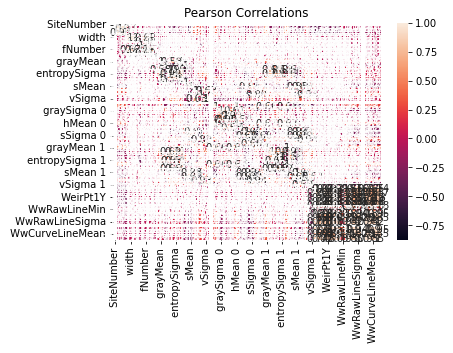

In [6]:
ax = sns.heatmap(df.corr(), annot=True).set(title='Pearson Correlations');

## Limpia de Datos

Convertir columnas de fecha/tiempo a segundos/enteros

In [7]:
x = pd.to_datetime(df['SensorTime'], format="%Y-%m-%d %H:%M:%S")

time = []
for day in x:
  time.append(day.timestamp())
df["SensorTimeINT"] = time

Crear segundo DataFrame con valores INT y dejando solo una variable dependiente la cual es Stage

In [8]:
df_int = df.drop(columns = ['SensorTime', ' CaptureTime', ' Filename', ' Agency', ' TimeZone', ' CalcTimestamp', ' Discharge'])
df_int.shape

(42059, 53)

##PCA

In [9]:
from sklearn.preprocessing import StandardScaler

X = df_int.loc[:, ~df_int.columns.isin([' Stage', ' Discharge'])]
std_scl = StandardScaler()

print('X:', X.shape)

x_std = std_scl.fit_transform(X)

print('Standard X:', x_std.shape)

X: (42059, 52)
Standard X: (42059, 52)


In [10]:
pca = PCA(n_components = 10)
pca.fit(x_std)

print("Componentes:")
print(pca.components_)

print("Varianza explicada:")
print(pca.explained_variance_)

print("Porcentaje de varianza explicada:")
print(pca.explained_variance_ratio_) 

Componentes:
[[ 4.81585951e-18  7.96667693e-03  7.96667693e-03  9.26500765e-02
   1.15980556e-02  7.95166596e-03  1.44017527e-02 -1.03062807e-01
   9.23121699e-02 -9.91437674e-02 -8.92079809e-02 -1.08804158e-01
   1.02500392e-01  1.87975774e-01 -2.16497549e-02 -1.98630085e-01
  -3.08527107e-03  4.50037324e-25 -1.47639196e-01  7.47361259e-02
  -6.75768020e-03 -5.08462473e-04 -1.48009608e-01  8.97776400e-02
   2.10036502e-01  1.78245155e-01 -2.05041750e-01  1.21665621e-01
  -1.85236778e-01 -6.47610259e-02 -6.57439289e-02 -6.38222673e-02
  -1.84827262e-01 -3.61019197e-02  1.97158941e-01  1.57026648e-01
  -2.01368634e-01  1.10060044e-01 -1.53672422e-01 -1.65264189e-01
  -1.62768680e-01 -1.66426132e-01 -1.60662076e-01 -9.03765099e-02
  -2.39435012e-01 -2.28789724e-01 -2.31906909e-01  0.00000000e+00
  -2.39013157e-01 -2.28938322e-01 -2.35712625e-01  1.35805948e-03]
 [ 7.08532988e-17  1.19911853e-02  1.19911853e-02 -1.28310671e-01
   1.07215715e-02  1.19846133e-02  3.51486080e-02  1.56261399e

Varianza explicada acumulada:
 [0.23733517 0.40074457 0.51830912 0.60506612 0.6777383  0.73292787
 0.7756933  0.80749544 0.83051317 0.85245674]


Text(0.5, 1.0, 'Número de componentes vs porcentaje de varianza explicada')

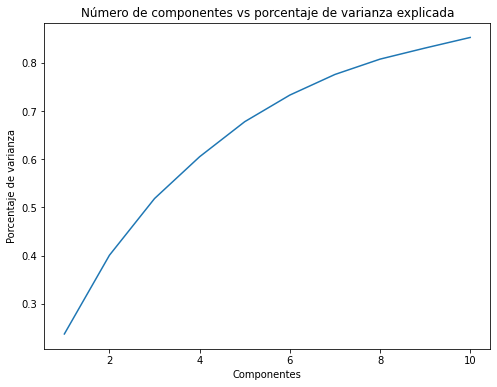

In [11]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print("Varianza explicada acumulada:\n", cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11, 1), cumulative_variance)
plt.xlabel("Componentes")
plt.ylabel("Porcentaje de varianza")
plt.title("Número de componentes vs porcentaje de varianza explicada")

In [12]:
pca = PCA(n_components = 10)
pca.fit(x_std)

scores = pca.transform(x_std)

print("Nuevas variables:\n", scores)

Nuevas variables:
 [[ 1.61943119  7.37536619  2.80839791 ...  0.6711027   0.19063104
   1.45018713]
 [ 1.3430288   7.63240248  2.85903467 ...  0.41133    -0.12043289
   1.20863628]
 [ 1.20612788  7.63913376  3.08082624 ... -0.01606963 -0.17557275
   1.16996206]
 ...
 [-2.59066786  0.17642717 -2.11902048 ...  1.11631284  1.83255531
  -0.5070035 ]
 [-3.15637994  0.46704954 -2.07084627 ...  1.26661228  1.78990032
  -0.49887236]
 [-3.94529137  0.68832833 -2.0944597  ...  1.37868433  1.86057083
  -0.65970822]]


##Selección de Datos

In [13]:
# Nuestras variables dependientes
y1 = df[' Stage']
y2 = df[' Discharge']

Obtenemos nuevo dataframe con variables unicas usando PCA

In [14]:
X_pca = pd.DataFrame(scores)

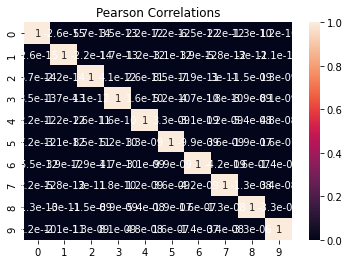

In [15]:
ax = sns.heatmap(X_pca.corr(), annot=True).set(title='Pearson Correlations');

Utilizando las columnas que fueron usadas en el paper

In [16]:
X = df[[' grayMean', ' graySigma', ' entropyMean', ' entropySigma', ' hMean', ' hSigma', ' sMean', ' sSigma', ' vMean', ' vSigma']]

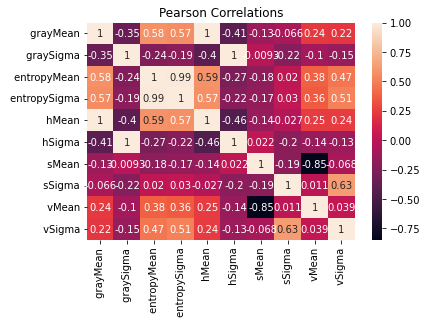

In [17]:
ax = sns.heatmap(X.corr(), annot=True).set(title='Pearson Correlations');

# Modelos con variables PCA

**Modelos con dependiente Stage**

In [18]:
# Tenemos una distribución de 60 - Train / 20 - Test / 20 - Validate
# Utiizamos y primera la cual es Stage

x_train, x_test, y1_train, y1_test = train_test_split(X_pca, y1, test_size=0.4)
x_test, x_val, y1_test, y1_val = train_test_split(x_test, y1_test, test_size=0.2)

Modelo MLP

In [19]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)
reg.fit(x_train, y1_train)

MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)

In [20]:
print('Test Score:', reg.score(x_test, y1_test))
print('Validation Score:', reg.score(x_val, y1_val))

Test Score: 0.7736897963249092
Validation Score: 0.763411171446339


Modelo RandomForest

In [21]:
from sklearn.ensemble import RandomForestRegressor
rdm = RandomForestRegressor(max_depth=50, random_state=0)
rdm.fit(x_train, y1_train)

RandomForestRegressor(max_depth=50, random_state=0)

In [22]:
print('Test Score:', rdm.score(x_test, y1_test))
print('Validation Score:', rdm.score(x_val, y1_val))

Test Score: 0.8289268846176137
Validation Score: 0.8377401357141908


Modelo SVR

In [23]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [24]:
print('Test Score:', regr.score(x_test, y1_test))
print('Validation Score:', regr.score(x_val, y1_val))

Test Score: 0.8149957056006759
Validation Score: 0.8181663714962879


**Modelos con dependiente Discharge**

In [25]:
# Train_Test_Split 60/20/20 para la variable dependiente Discharge

x_train, x_test, y2_train, y2_test = train_test_split(X_pca, y2, test_size=0.4)
x_test, x_val, y2_test, y2_val = train_test_split(x_test, y2_test, test_size=0.2)

Modelo MLP

In [26]:
reg = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)
reg.fit(x_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)

In [27]:
print('Test Score:', reg.score(x_test, y2_test))
print('Validation Score:', reg.score(x_val, y2_val))

Test Score: 0.5540192678964293
Validation Score: 0.5244806518585678


Modelo RandomForest

In [28]:
rdm = RandomForestRegressor(max_depth=50, random_state=0)
rdm.fit(x_train, y1_train)

RandomForestRegressor(max_depth=50, random_state=0)

In [29]:
print('Test Score:', rdm.score(x_test, y2_test))
print('Validation Score:', rdm.score(x_val, y2_val))

Test Score: -0.6554460344987074
Validation Score: -0.6650281055470029


Modelo SVR

In [30]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [31]:
print('Test Score:', regr.score(x_test, y2_test))
print('Validation Score:', regr.score(x_val, y2_val))

Test Score: -0.655771139926101
Validation Score: -0.6653528092312044


# Modelos con variables Originales

**Modelos con variable dependiente Stage**

In [35]:
# Dividimos las variables 60/20/20
x_train, x_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.4)
x_test, x_val, y1_test, y1_val = train_test_split(X, y1, test_size=0.2)

Modelo MLP

In [36]:
reg = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)
reg.fit(x_train, y1_train)

MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)

In [37]:
print('Test Score:', reg.score(x_test, y1_test))
print('Validation Score:', reg.score(x_val, y1_val))

Test Score: 0.3976766704553045
Validation Score: 0.39499661691286925


Modelo RandomForest

In [39]:
rdm = RandomForestRegressor(max_depth=50, random_state=0)
rdm.fit(x_train, y1_train)

RandomForestRegressor(max_depth=50, random_state=0)

In [40]:
print('Test Score:', rdm.score(x_test, y1_test))
print('Validation Score:', rdm.score(x_val, y1_val))

Test Score: 0.8276381767882249
Validation Score: 0.8224104344167973


Modelo SVR

In [41]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [42]:
print('Test Score:', regr.score(x_test, y1_test))
print('Validation Score:', regr.score(x_val, y1_val))

Test Score: 0.5833300203468949
Validation Score: 0.5870762448994475


**Modelos con variable dependiente Discharge**

In [43]:
# Dividimos las variables 60/20/20
x_train, x_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.4)
x_test, x_val, y2_test, y2_val = train_test_split(X, y2, test_size=0.2)

Modelo MLP

In [44]:
reg = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)
reg.fit(x_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1)

In [45]:
print('Test Score:', reg.score(x_test, y2_test))
print('Validation Score:', reg.score(x_val, y2_val))

Test Score: 0.263249386541094
Validation Score: 0.26352244094124


Modelo RandomForest

In [46]:
rdm = RandomForestRegressor(max_depth=50, random_state=0)
rdm.fit(x_train, y2_train)

RandomForestRegressor(max_depth=50, random_state=0)

In [47]:
print('Test Score:', rdm.score(x_test, y2_test))
print('Validation Score:', rdm.score(x_val, y2_val))

Test Score: 0.8099165869485643
Validation Score: 0.7872938779121751


Modelo SVR

In [48]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train, y2_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [49]:
print('Test Score:', regr.score(x_test, y2_test))
print('Validation Score:', regr.score(x_val, y2_val))

Test Score: 0.20026144259080758
Validation Score: 0.19724528056912372
